In [2]:
import requests
import pandas as pd
import pycountry
import numpy as np
import pycountry_convert as pc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import mysql.connector


Dataset Overview & Collection

In [3]:
# For Adults Obesity 
url = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
response = requests.get(url)
adults_Obesity = response.json()
adults_Obesity

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#NCD_BMI_30C',
 'value': [{'Id': 7639624,
   'IndicatorCode': 'NCD_BMI_30C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'SLE',
   'TimeDimType': 'YEAR',
   'ParentLocationCode': 'AFR',
   'ParentLocation': 'Africa',
   'Dim1Type': 'SEX',
   'TimeDim': 1997,
   'Dim1': 'SEX_MLE',
   'Dim2Type': 'AGEGROUP',
   'Dim2': 'AGEGROUP_YEARS18-PLUS',
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '1.0 [0.6-1.6]',
   'NumericValue': 0.97699203,
   'Low': 0.56905728,
   'High': 1.5597835,
   'Comments': None,
   'Date': '2024-02-29T16:06:41.017+01:00',
   'TimeDimensionValue': '1997',
   'TimeDimensionBegin': '1997-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '1997-12-31T00:00:00+01:00'},
  {'Id': 7639709,
   'IndicatorCode': 'NCD_BMI_30C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'SWE',
   'TimeDimType': 'YEAR',
   'ParentLocationCode': 'EUR',
   'ParentLocation'

In [4]:
# For Childern Obesity 
url = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
response = requests.get(url)
childern_obesity = response.json()
childern_obesity

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#NCD_BMI_PLUS2C',
 'value': [{'Id': 7639642,
   'IndicatorCode': 'NCD_BMI_PLUS2C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'THA',
   'ParentLocationCode': 'SEAR',
   'TimeDimType': 'YEAR',
   'ParentLocation': 'South-East Asia',
   'Dim1Type': 'SEX',
   'Dim1': 'SEX_MLE',
   'TimeDim': 1999,
   'Dim2Type': 'AGEGROUP',
   'Dim2': 'AGEGROUP_YEARS10-19',
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '4.6 [3.6-5.8]',
   'NumericValue': 4.6482865,
   'Low': 3.6058817,
   'High': 5.815459,
   'Comments': None,
   'Date': '2024-02-29T16:06:41.017+01:00',
   'TimeDimensionValue': '1999',
   'TimeDimensionBegin': '1999-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '1999-12-31T00:00:00+01:00'},
  {'Id': 7639788,
   'IndicatorCode': 'NCD_BMI_PLUS2C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'EST',
   'ParentLocationCode': 'EUR',
   'TimeDimType': 'YEAR',
   'P

In [5]:
# For Adults Malnutrition 
url = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
response = requests.get(url)
adults_malnutrition = response.json()
adults_malnutrition

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#NCD_BMI_18C',
 'value': [{'Id': 7639674,
   'IndicatorCode': 'NCD_BMI_18C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'LBR',
   'TimeDimType': 'YEAR',
   'ParentLocationCode': 'AFR',
   'ParentLocation': 'Africa',
   'Dim1Type': 'SEX',
   'Dim1': 'SEX_BTSX',
   'TimeDim': 2019,
   'Dim2Type': 'AGEGROUP',
   'Dim2': 'AGEGROUP_YEARS18-PLUS',
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '6.1 [5.0-7.5]',
   'NumericValue': 6.1473299,
   'Low': 4.9744047,
   'High': 7.4798599,
   'Comments': None,
   'Date': '2024-02-29T16:06:41.017+01:00',
   'TimeDimensionValue': '2019',
   'TimeDimensionBegin': '2019-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '2019-12-31T00:00:00+01:00'},
  {'Id': 7639779,
   'IndicatorCode': 'NCD_BMI_18C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'SYR',
   'TimeDimType': 'YEAR',
   'ParentLocationCode': 'EMR',
   'ParentLocation':

In [6]:
# For Childern Malnutrition 
url = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"
response = requests.get(url)
childern_malnutrition = response.json()
childern_malnutrition

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#NCD_BMI_MINUS2C',
 'value': [{'Id': 7639656,
   'IndicatorCode': 'NCD_BMI_MINUS2C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'THA',
   'ParentLocationCode': 'SEAR',
   'TimeDimType': 'YEAR',
   'ParentLocation': 'South-East Asia',
   'Dim1Type': 'SEX',
   'Dim1': 'SEX_MLE',
   'TimeDim': 1997,
   'Dim2Type': 'AGEGROUP',
   'Dim2': 'AGEGROUP_YEARS05-19',
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '11.5 [9.7-13.6]',
   'NumericValue': 11.542109,
   'Low': 9.6640706,
   'High': 13.558258,
   'Comments': None,
   'Date': '2024-02-29T16:06:41.017+01:00',
   'TimeDimensionValue': '1997',
   'TimeDimensionBegin': '1997-01-01T00:00:00+01:00',
   'TimeDimensionEnd': '1997-12-31T00:00:00+01:00'},
  {'Id': 7639718,
   'IndicatorCode': 'NCD_BMI_MINUS2C',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'POL',
   'ParentLocationCode': 'EUR',
   'TimeDimType': 'YEAR',

In [7]:
df = pd.DataFrame(adults_Obesity['value'])

In [8]:
df['age_group'] = 'adults'

In [9]:
df

Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0       7639624   NCD_BMI_30C        COUNTRY        SLE        YEAR   
1       7639709   NCD_BMI_30C        COUNTRY        SWE        YEAR   
2       7639783   NCD_BMI_30C        COUNTRY        GAB        YEAR   
3           266   NCD_BMI_30C        COUNTRY        KHM        YEAR   
4           364   NCD_BMI_30C        COUNTRY        IRN        YEAR   
...         ...           ...            ...        ...         ...   
20785  10116013   NCD_BMI_30C        COUNTRY        LTU        YEAR   
20786  10116699   NCD_BMI_30C        COUNTRY        ARM        YEAR   
20787  10118100   NCD_BMI_30C        COUNTRY        ERI        YEAR   
20788  10118214   NCD_BMI_30C        COUNTRY        VCT        YEAR   
20789  10118306   NCD_BMI_30C        COUNTRY        TUN        YEAR   

      ParentLocationCode         ParentLocation Dim1Type  TimeDim      Dim1  \
0                    AFR                 Africa      SEX     1997   SEX_MLE   
1                    EUR                 Europe      SEX     2005   SEX_MLE   
2                    AFR                 Africa      SEX     2003   SEX_MLE   
3                    WPR        Western Pacific      SEX     2001  SEX_BTSX   
4                    EMR  Eastern Mediterranean      SEX     2020   SEX_MLE   
...                  ...                    ...      ...      ...       ...   
20785                EUR                 Europe      SEX     2013  SEX_BTSX   
20786                EUR                 Europe      SEX     1997  SEX_BTSX   
20787                AFR                 Africa      SEX     2011   SEX_MLE   
20788                AMR               Americas      SEX     2003   SEX_MLE   
20789                EMR  Eastern Mediterranean      SEX     2007  SEX_BTSX   

       ...             Value NumericValue        Low       High Comments  \
0      ...     1.0 [0.6-1.6]     0.976992   0.569057   1.559783     None   
1      ...  14.9 [13.7-16.2]    14.936389  13.654490  16.236620     None   
2      ...     5.1 [3.1-7.7]     5.103419   3.097174   7.685506     None   
3      ...     1.0 [0.8-1.3]     0.981696   0.756741   1.274868     None   
4      ...  17.5 [15.8-19.2]    17.487641  15.793777  19.245727     None   
...    ...               ...          ...        ...        ...      ...   
20785  ...  27.4 [24.0-30.9]    27.397758  24.044071  30.898288     None   
20786  ...  14.0 [12.1-15.9]    13.950612  12.098271  15.933628     None   
20787  ...     1.2 [0.8-1.8]     1.202328   0.767176   1.784962     None   
20788  ...   10.2 [7.1-14.0]    10.207333   7.093262  13.982071     None   
20789  ...  18.6 [17.0-20.3]    18.639244  17.021045  20.305818     None   

                                Date TimeDimensionValue  \
0      2024-02-29T16:06:41.017+01:00               1997   
1      2024-02-29T16:06:41.017+01:00               2005   
2      2024-02-29T16:06:41.017+01:00               2003   
3      2024-02-29T16:06:41.017+01:00               2001   
4      2024-02-29T16:06:41.017+01:00               2020   
...                              ...                ...   
20785  2024-02-29T16:06:41.017+01:00               2013   
20786  2024-02-29T16:06:41.017+01:00               1997   
20787  2024-02-29T16:06:41.017+01:00               2011   
20788  2024-02-29T16:06:41.017+01:00               2003   
20789  2024-02-29T16:06:41.017+01:00               2007   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
0      1997-01-01T00:00:00+01:00  1997-12-31T00:00:00+01:00     adults  
1      2005-01-01T00:00:00+01:00  2005-12-31T00:00:00+01:00     adults  
2      2003-01-01T00:00:00+01:00  2003-12-31T00:00:00+01:00     adults  
3      2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00     adults  
4      2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00     adults  
...                          ...                        ...        ...  
20785  2013-01-01T00:00:00+01:00  2013-12-31T00:00:00+01:00     adults  
20786

In [10]:
df1 = pd.DataFrame(childern_obesity['value'])

In [11]:
df1['age_group'] = 'children'

In [12]:
df1

Id   IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0       7639642  NCD_BMI_PLUS2C        COUNTRY        THA               SEAR   
1       7639788  NCD_BMI_PLUS2C        COUNTRY        EST                EUR   
2       7639888  NCD_BMI_PLUS2C        COUNTRY        BIH                EUR   
3       7640024  NCD_BMI_PLUS2C        COUNTRY        LBY                EMR   
4       7640175  NCD_BMI_PLUS2C        COUNTRY        SEN                AFR   
...         ...             ...            ...        ...                ...   
62365  10117896  NCD_BMI_PLUS2C        COUNTRY        BEL                EUR   
62366  10118137  NCD_BMI_PLUS2C        COUNTRY        SDN                EMR   
62367  10118488  NCD_BMI_PLUS2C        COUNTRY        CPV                AFR   
62368  10118521  NCD_BMI_PLUS2C        COUNTRY        STP                AFR   
62369  10118750  NCD_BMI_PLUS2C        COUNTRY        BGD               SEAR   

      TimeDimType         ParentLocation Dim1Type      Dim1  TimeDim  ...  \
0            YEAR        South-East Asia      SEX   SEX_MLE     1999  ...   
1            YEAR                 Europe      SEX  SEX_FMLE     1994  ...   
2            YEAR                 Europe      SEX  SEX_BTSX     2002  ...   
3            YEAR  Eastern Mediterranean      SEX  SEX_BTSX     2019  ...   
4            YEAR                 Africa      SEX  SEX_FMLE     2016  ...   
...           ...                    ...      ...       ...      ...  ...   
62365        YEAR                 Europe      SEX  SEX_BTSX     1997  ...   
62366        YEAR  Eastern Mediterranean      SEX  SEX_BTSX     2006  ...   
62367        YEAR                 Africa      SEX  SEX_BTSX     2000  ...   
62368        YEAR                 Africa      SEX   SEX_MLE     2005  ...   
62369        YEAR        South-East Asia      SEX   SEX_MLE     2006  ...   

                 Value NumericValue       Low       High Comments  \
0        4.6 [3.6-5.8]     4.648287  3.605882   5.815459     None   
1        2.4 [0.9-4.8]     2.365308  0.866337   4.766858     None   
2       9.9 [4.4-17.3]     9.895466  4.364658  17.257716     None   
3      14.4 [7.0-23.7]    14.364699  6.998877  23.707674     None   
4        1.7 [0.5-3.9]     1.660375  0.480477   3.943857     None   
...                ...          ...       ...        ...      ...   
62365    5.1 [3.4-7.0]     5.051485  3.437404   7.006245     None   
62366    1.7 [0.7-3.4]     1.715090  0.693640   3.385158     None   
62367    1.8 [0.4-5.0]     1.842421  0.359353   5.004200     None   
62368   4.7 [0.9-12.3]     4.681022  0.928813  12.270057     None   
62369    0.8 [0.1-2.2]     0.761684  0.145416   2.187117     None   

                                Date TimeDimensionValue  \
0      2024-02-29T16:06:41.017+01:00               1999   
1      2024-02-29T16:06:41.017+01:00               1994   
2      2024-02-29T16:06:41.017+01:00               2002   
3      2024-02-29T16:06:41.017+01:00               2019   
4      2024-02-29T16:06:41.017+01:00               2016   
...                              ...                ...   
62365  2024-02-29T16:06:41.017+01:00               1997   
62366  2024-02-29T16:06:41.017+01:00               2006   
62367  2024-02-29T16:06:41.017+01:00               2000   
62368  2024-02-29T16:06:41.017+01:00               2005   
62369  2024-02-29T16:06:41.017+01:00               2006   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
0      1999-01-01T00:00:00+01:00  1999-12-31T00:00:00+01:00   children  
1      1994-01-01T00:00:00+01:00  1994-12-31T00:00:00+01:00   children  
2      2002-01-01T00:00:00+01:00  2002-12-31T00:00:00+01:00   children  
3      2019-01-01T00:00:00+01:00  2019-12-31T00:00:00+01:00   children  
4      2016-01-01T00:00:00+01:00  2016-12-31T00:00:00+01:00   children  
...                          ...                        ...        ...  
62365  1997-01-01T00:00:00+01:00  1997-12-31T00:00:00+01:00   children  
62366

In [13]:
df2 = pd.DataFrame(adults_malnutrition['value'])

In [14]:
df2['age_group'] = 'adults'

In [15]:
df2

Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0       7639674   NCD_BMI_18C        COUNTRY        LBR        YEAR   
1       7639779   NCD_BMI_18C        COUNTRY        SYR        YEAR   
2       7639834   NCD_BMI_18C        COUNTRY        COG        YEAR   
3            54   NCD_BMI_18C        COUNTRY        GAB        YEAR   
4           422   NCD_BMI_18C        COUNTRY        TUV        YEAR   
...         ...           ...            ...        ...         ...   
20785  10117667   NCD_BMI_18C        COUNTRY        BGR        YEAR   
20786  10118059   NCD_BMI_18C        COUNTRY        ITA        YEAR   
20787  10118338   NCD_BMI_18C        COUNTRY        PRK        YEAR   
20788  10118404   NCD_BMI_18C        COUNTRY        BMU        YEAR   
20789  10118535   NCD_BMI_18C        COUNTRY        USA        YEAR   

      ParentLocationCode         ParentLocation Dim1Type      Dim1  TimeDim  \
0                    AFR                 Africa      SEX  SEX_BTSX     2019   
1                    EMR  Eastern Mediterranean      SEX  SEX_BTSX     2013   
2                    AFR                 Africa      SEX   SEX_MLE     1991   
3                    AFR                 Africa      SEX  SEX_FMLE     2021   
4                    WPR        Western Pacific      SEX  SEX_BTSX     2001   
...                  ...                    ...      ...       ...      ...   
20785                EUR                 Europe      SEX   SEX_MLE     1997   
20786                EUR                 Europe      SEX   SEX_MLE     1991   
20787               SEAR        South-East Asia      SEX  SEX_BTSX     2013   
20788                AMR               Americas      SEX   SEX_MLE     1998   
20789                AMR               Americas      SEX   SEX_MLE     2007   

       ...             Value NumericValue        Low       High Comments  \
0      ...     6.1 [5.0-7.5]     6.147330   4.974405   7.479860     None   
1      ...     3.0 [1.8-4.7]     3.042609   1.770855   4.654348     None   
2      ...  21.6 [15.4-28.2]    21.601304  15.394473  28.244272     None   
3      ...     5.8 [4.0-8.1]     5.795110   3.972036   8.077021     None   
4      ...     0.9 [0.4-1.9]     0.936569   0.365154   1.859289     None   
...    ...               ...          ...        ...        ...      ...   
20785  ...     2.2 [1.2-3.6]     2.213533   1.204645   3.577605     None   
20786  ...     1.2 [0.9-1.6]     1.232410   0.932349   1.596508     None   
20787  ...   12.5 [6.2-20.7]    12.469240   6.202460  20.722955     None   
20788  ...    7.3 [2.4-15.5]     7.302523   2.360902  15.543477     None   
20789  ...     1.0 [0.8-1.2]     0.982255   0.800443   1.188796     None   

                                Date TimeDimensionValue  \
0      2024-02-29T16:06:41.017+01:00               2019   
1      2024-02-29T16:06:41.017+01:00               2013   
2      2024-02-29T16:06:41.017+01:00               1991   
3      2024-02-29T16:06:41.017+01:00               2021   
4      2024-02-29T16:06:41.017+01:00               2001   
...                              ...                ...   
20785  2024-02-29T16:06:41.017+01:00               1997   
20786  2024-02-29T16:06:41.017+01:00               1991   
20787  2024-02-29T16:06:41.017+01:00               2013   
20788  2024-02-29T16:06:41.017+01:00               1998   
20789  2024-02-29T16:06:41.017+01:00               2007   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
0      2019-01-01T00:00:00+01:00  2019-12-31T00:00:00+01:00     adults  
1      2013-01-01T00:00:00+01:00  2013-12-31T00:00:00+01:00     adults  
2      1991-01-01T00:00:00+01:00  1991-12-31T00:00:00+01:00     adults  
3      2021-01-01T00:00:00+01:00  2021-12-31T00:00:00+01:00     adults  
4      2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00     adults  
...                          ...                        ...        ...  
20785  1997-01-01T00:00:00+01:00  1997-12-31T00:00:00+01:00     adults  
20786

In [16]:
df3 = pd.DataFrame(adults_malnutrition['value'])

In [17]:
df3['age_group'] = 'children'

In [18]:
df3

Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0       7639674   NCD_BMI_18C        COUNTRY        LBR        YEAR   
1       7639779   NCD_BMI_18C        COUNTRY        SYR        YEAR   
2       7639834   NCD_BMI_18C        COUNTRY        COG        YEAR   
3            54   NCD_BMI_18C        COUNTRY        GAB        YEAR   
4           422   NCD_BMI_18C        COUNTRY        TUV        YEAR   
...         ...           ...            ...        ...         ...   
20785  10117667   NCD_BMI_18C        COUNTRY        BGR        YEAR   
20786  10118059   NCD_BMI_18C        COUNTRY        ITA        YEAR   
20787  10118338   NCD_BMI_18C        COUNTRY        PRK        YEAR   
20788  10118404   NCD_BMI_18C        COUNTRY        BMU        YEAR   
20789  10118535   NCD_BMI_18C        COUNTRY        USA        YEAR   

      ParentLocationCode         ParentLocation Dim1Type      Dim1  TimeDim  \
0                    AFR                 Africa      SEX  SEX_BTSX     2019   
1                    EMR  Eastern Mediterranean      SEX  SEX_BTSX     2013   
2                    AFR                 Africa      SEX   SEX_MLE     1991   
3                    AFR                 Africa      SEX  SEX_FMLE     2021   
4                    WPR        Western Pacific      SEX  SEX_BTSX     2001   
...                  ...                    ...      ...       ...      ...   
20785                EUR                 Europe      SEX   SEX_MLE     1997   
20786                EUR                 Europe      SEX   SEX_MLE     1991   
20787               SEAR        South-East Asia      SEX  SEX_BTSX     2013   
20788                AMR               Americas      SEX   SEX_MLE     1998   
20789                AMR               Americas      SEX   SEX_MLE     2007   

       ...             Value NumericValue        Low       High Comments  \
0      ...     6.1 [5.0-7.5]     6.147330   4.974405   7.479860     None   
1      ...     3.0 [1.8-4.7]     3.042609   1.770855   4.654348     None   
2      ...  21.6 [15.4-28.2]    21.601304  15.394473  28.244272     None   
3      ...     5.8 [4.0-8.1]     5.795110   3.972036   8.077021     None   
4      ...     0.9 [0.4-1.9]     0.936569   0.365154   1.859289     None   
...    ...               ...          ...        ...        ...      ...   
20785  ...     2.2 [1.2-3.6]     2.213533   1.204645   3.577605     None   
20786  ...     1.2 [0.9-1.6]     1.232410   0.932349   1.596508     None   
20787  ...   12.5 [6.2-20.7]    12.469240   6.202460  20.722955     None   
20788  ...    7.3 [2.4-15.5]     7.302523   2.360902  15.543477     None   
20789  ...     1.0 [0.8-1.2]     0.982255   0.800443   1.188796     None   

                                Date TimeDimensionValue  \
0      2024-02-29T16:06:41.017+01:00               2019   
1      2024-02-29T16:06:41.017+01:00               2013   
2      2024-02-29T16:06:41.017+01:00               1991   
3      2024-02-29T16:06:41.017+01:00               2021   
4      2024-02-29T16:06:41.017+01:00               2001   
...                              ...                ...   
20785  2024-02-29T16:06:41.017+01:00               1997   
20786  2024-02-29T16:06:41.017+01:00               1991   
20787  2024-02-29T16:06:41.017+01:00               2013   
20788  2024-02-29T16:06:41.017+01:00               1998   
20789  2024-02-29T16:06:41.017+01:00               2007   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
0      2019-01-01T00:00:00+01:00  2019-12-31T00:00:00+01:00   children  
1      2013-01-01T00:00:00+01:00  2013-12-31T00:00:00+01:00   children  
2      1991-01-01T00:00:00+01:00  1991-12-31T00:00:00+01:00   children  
3      2021-01-01T00:00:00+01:00  2021-12-31T00:00:00+01:00   children  
4      2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00   children  
...                          ...                        ...        ...  
20785  1997-01-01T00:00:00+01:00  1997-12-31T00:00:00+01:00   children  
20786

In [19]:
df_obesity = pd.concat([df, df1], ignore_index=True)

In [20]:
df_obesity


Id   IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0       7639624     NCD_BMI_30C        COUNTRY        SLE        YEAR   
1       7639709     NCD_BMI_30C        COUNTRY        SWE        YEAR   
2       7639783     NCD_BMI_30C        COUNTRY        GAB        YEAR   
3           266     NCD_BMI_30C        COUNTRY        KHM        YEAR   
4           364     NCD_BMI_30C        COUNTRY        IRN        YEAR   
...         ...             ...            ...        ...         ...   
83155  10117896  NCD_BMI_PLUS2C        COUNTRY        BEL        YEAR   
83156  10118137  NCD_BMI_PLUS2C        COUNTRY        SDN        YEAR   
83157  10118488  NCD_BMI_PLUS2C        COUNTRY        CPV        YEAR   
83158  10118521  NCD_BMI_PLUS2C        COUNTRY        STP        YEAR   
83159  10118750  NCD_BMI_PLUS2C        COUNTRY        BGD        YEAR   

      ParentLocationCode         ParentLocation Dim1Type  TimeDim      Dim1  \
0                    AFR                 Africa      SEX     1997   SEX_MLE   
1                    EUR                 Europe      SEX     2005   SEX_MLE   
2                    AFR                 Africa      SEX     2003   SEX_MLE   
3                    WPR        Western Pacific      SEX     2001  SEX_BTSX   
4                    EMR  Eastern Mediterranean      SEX     2020   SEX_MLE   
...                  ...                    ...      ...      ...       ...   
83155                EUR                 Europe      SEX     1997  SEX_BTSX   
83156                EMR  Eastern Mediterranean      SEX     2006  SEX_BTSX   
83157                AFR                 Africa      SEX     2000  SEX_BTSX   
83158                AFR                 Africa      SEX     2005   SEX_MLE   
83159               SEAR        South-East Asia      SEX     2006   SEX_MLE   

       ...             Value NumericValue        Low       High Comments  \
0      ...     1.0 [0.6-1.6]     0.976992   0.569057   1.559783     None   
1      ...  14.9 [13.7-16.2]    14.936389  13.654490  16.236620     None   
2      ...     5.1 [3.1-7.7]     5.103419   3.097174   7.685506     None   
3      ...     1.0 [0.8-1.3]     0.981696   0.756741   1.274868     None   
4      ...  17.5 [15.8-19.2]    17.487641  15.793777  19.245727     None   
...    ...               ...          ...        ...        ...      ...   
83155  ...     5.1 [3.4-7.0]     5.051485   3.437404   7.006245     None   
83156  ...     1.7 [0.7-3.4]     1.715090   0.693640   3.385158     None   
83157  ...     1.8 [0.4-5.0]     1.842421   0.359353   5.004200     None   
83158  ...    4.7 [0.9-12.3]     4.681022   0.928813  12.270057     None   
83159  ...     0.8 [0.1-2.2]     0.761684   0.145416   2.187117     None   

                                Date TimeDimensionValue  \
0      2024-02-29T16:06:41.017+01:00               1997   
1      2024-02-29T16:06:41.017+01:00               2005   
2      2024-02-29T16:06:41.017+01:00               2003   
3      2024-02-29T16:06:41.017+01:00               2001   
4      2024-02-29T16:06:41.017+01:00               2020   
...                              ...                ...   
83155  2024-02-29T16:06:41.017+01:00               1997   
83156  2024-02-29T16:06:41.017+01:00               2006   
83157  2024-02-29T16:06:41.017+01:00               2000   
83158  2024-02-29T16:06:41.017+01:00               2005   
83159  2024-02-29T16:06:41.017+01:00               2006   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
0      1997-01-01T00:00:00+01:00  1997-12-31T00:00:00+01:00     adults  
1      2005-01-01T00:00:00+01:00  2005-12-31T00:00:00+01:00     adults  
2      2003-01-01T00:00:00+01:00  2003-12-31T00:00:00+01:00     adults  
3      2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00     adults  
4      2020-01-01T00:00:00+01:00  2020-12-31T00:00:00+01:00     adults  
...                          ...                        ...        ...  
83155  1997-01-01T00:00:00+01:00  1997-12-31T00:00:00+

In [21]:
df_malnutrition = pd.concat([df2, df3], ignore_index=True)

In [22]:
df_malnutrition

Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0       7639674   NCD_BMI_18C        COUNTRY        LBR        YEAR   
1       7639779   NCD_BMI_18C        COUNTRY        SYR        YEAR   
2       7639834   NCD_BMI_18C        COUNTRY        COG        YEAR   
3            54   NCD_BMI_18C        COUNTRY        GAB        YEAR   
4           422   NCD_BMI_18C        COUNTRY        TUV        YEAR   
...         ...           ...            ...        ...         ...   
41575  10117667   NCD_BMI_18C        COUNTRY        BGR        YEAR   
41576  10118059   NCD_BMI_18C        COUNTRY        ITA        YEAR   
41577  10118338   NCD_BMI_18C        COUNTRY        PRK        YEAR   
41578  10118404   NCD_BMI_18C        COUNTRY        BMU        YEAR   
41579  10118535   NCD_BMI_18C        COUNTRY        USA        YEAR   

      ParentLocationCode         ParentLocation Dim1Type      Dim1  TimeDim  \
0                    AFR                 Africa      SEX  SEX_BTSX     2019   
1                    EMR  Eastern Mediterranean      SEX  SEX_BTSX     2013   
2                    AFR                 Africa      SEX   SEX_MLE     1991   
3                    AFR                 Africa      SEX  SEX_FMLE     2021   
4                    WPR        Western Pacific      SEX  SEX_BTSX     2001   
...                  ...                    ...      ...       ...      ...   
41575                EUR                 Europe      SEX   SEX_MLE     1997   
41576                EUR                 Europe      SEX   SEX_MLE     1991   
41577               SEAR        South-East Asia      SEX  SEX_BTSX     2013   
41578                AMR               Americas      SEX   SEX_MLE     1998   
41579                AMR               Americas      SEX   SEX_MLE     2007   

       ...             Value NumericValue        Low       High Comments  \
0      ...     6.1 [5.0-7.5]     6.147330   4.974405   7.479860     None   
1      ...     3.0 [1.8-4.7]     3.042609   1.770855   4.654348     None   
2      ...  21.6 [15.4-28.2]    21.601304  15.394473  28.244272     None   
3      ...     5.8 [4.0-8.1]     5.795110   3.972036   8.077021     None   
4      ...     0.9 [0.4-1.9]     0.936569   0.365154   1.859289     None   
...    ...               ...          ...        ...        ...      ...   
41575  ...     2.2 [1.2-3.6]     2.213533   1.204645   3.577605     None   
41576  ...     1.2 [0.9-1.6]     1.232410   0.932349   1.596508     None   
41577  ...   12.5 [6.2-20.7]    12.469240   6.202460  20.722955     None   
41578  ...    7.3 [2.4-15.5]     7.302523   2.360902  15.543477     None   
41579  ...     1.0 [0.8-1.2]     0.982255   0.800443   1.188796     None   

                                Date TimeDimensionValue  \
0      2024-02-29T16:06:41.017+01:00               2019   
1      2024-02-29T16:06:41.017+01:00               2013   
2      2024-02-29T16:06:41.017+01:00               1991   
3      2024-02-29T16:06:41.017+01:00               2021   
4      2024-02-29T16:06:41.017+01:00               2001   
...                              ...                ...   
41575  2024-02-29T16:06:41.017+01:00               1997   
41576  2024-02-29T16:06:41.017+01:00               1991   
41577  2024-02-29T16:06:41.017+01:00               2013   
41578  2024-02-29T16:06:41.017+01:00               1998   
41579  2024-02-29T16:06:41.017+01:00               2007   

              TimeDimensionBegin           TimeDimensionEnd  age_group  
0      2019-01-01T00:00:00+01:00  2019-12-31T00:00:00+01:00     adults  
1      2013-01-01T00:00:00+01:00  2013-12-31T00:00:00+01:00     adults  
2      1991-01-01T00:00:00+01:00  1991-12-31T00:00:00+01:00     adults  
3      2021-01-01T00:00:00+01:00  2021-12-31T00:00:00+01:00     adults  
4      2001-01-01T00:00:00+01:00  2001-12-31T00:00:00+01:00     adults  
...                          ...                        ...        ...  
41575  1997-01-01T00:00:00+01:00  1997-12-31T00:00:00+01:00   children  
41576

In [23]:
# Filter each dataset to include only records from the years 2012 to 2022
dfs = [df_obesity, df_malnutrition]

for i in range(len(dfs)):
    dfs[i] = dfs[i][(dfs[i]['TimeDim']>=2012) & (dfs[i]['TimeDim']<=2022)]

df_obesity, df_malnutrition = dfs

In [24]:
df_obesity['TimeDim'].unique()

array([2020, 2014, 2019, 2018, 2021, 2015, 2017, 2016, 2012, 2013, 2022])

Data Cleaning & Feature Engineering


In [25]:
dfs = [df_obesity, df_malnutrition]

# Columns to Retain
columns_to_retain = ['ParentLocation','Dim1', 'TimeDim', 'Low', 'High', 'NumericValue', 'SpatialDim', 'age_group']

for i in range(len(dfs)):
    dfs[i] = dfs[i][columns_to_retain]

df_obesity, df_malnutrition = dfs

In [26]:
df_obesity

ParentLocation      Dim1  TimeDim        Low       High  \
4      Eastern Mediterranean   SEX_MLE     2020  15.793777  19.245727   
11     Eastern Mediterranean   SEX_MLE     2020  23.089589  33.815336   
17                    Europe  SEX_FMLE     2014  24.924766  31.213260   
19                    Europe  SEX_FMLE     2019  28.160682  35.574925   
20                    Europe  SEX_BTSX     2018  29.905805  37.470856   
...                      ...       ...      ...        ...        ...   
83137                 Europe  SEX_BTSX     2020   0.964176   2.197432   
83140  Eastern Mediterranean  SEX_FMLE     2012   0.302039   5.872414   
83148        Western Pacific   SEX_MLE     2021   3.325899  34.877816   
83151                 Africa   SEX_MLE     2014   0.236481   6.341185   
83154                 Europe   SEX_MLE     2017  10.087850  12.760153   

       NumericValue SpatialDim age_group  
4         17.487641        IRN    adults  
11        28.335530        IRQ    adults  
17        27.948704        GRL    adults  
19        31.893221        ARM    adults  
20        33.694205        MLT    adults  
...             ...        ...       ...  
83137      1.475931        TJK  children  
83140      1.966190        SOM  children  
83148     16.634887        VUT  children  
83151      2.032189        MDG  children  
83154     11.390631        FIN  children  

[27720 rows x 8 columns]

In [27]:
#Renaming the columns 
dfs = [df_obesity, df_malnutrition]

for i in range(len(dfs)):
    dfs[i] = dfs[i].rename(columns={
    'TimeDim': 'Year',
    'Dim1': 'Gender',
    'NumericValue': 'Mean_Estimate',
    'Low': 'LowerBound',
    'High': 'UpperBound',
    'ParentLocation': 'Region',
    'SpatialDim': 'Country'
})

df_obesity, df_malnutrition = dfs

In [28]:
df_obesity

Region    Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean   SEX_MLE  2020   15.793777   19.245727   
11     Eastern Mediterranean   SEX_MLE  2020   23.089589   33.815336   
17                    Europe  SEX_FMLE  2014   24.924766   31.213260   
19                    Europe  SEX_FMLE  2019   28.160682   35.574925   
20                    Europe  SEX_BTSX  2018   29.905805   37.470856   
...                      ...       ...   ...         ...         ...   
83137                 Europe  SEX_BTSX  2020    0.964176    2.197432   
83140  Eastern Mediterranean  SEX_FMLE  2012    0.302039    5.872414   
83148        Western Pacific   SEX_MLE  2021    3.325899   34.877816   
83151                 Africa   SEX_MLE  2014    0.236481    6.341185   
83154                 Europe   SEX_MLE  2017   10.087850   12.760153   

       Mean_Estimate Country age_group  
4          17.487641     IRN    adults  
11         28.335530     IRQ    adults  
17         27.948704     GRL    adults  
19         31.893221     ARM    adults  
20         33.694205     MLT    adults  
...              ...     ...       ...  
83137       1.475931     TJK  children  
83140       1.966190     SOM  children  
83148      16.634887     VUT  children  
83151       2.032189     MDG  children  
83154      11.390631     FIN  children  

[27720 rows x 8 columns]

In [29]:
#Renaming the value 
dfs = [df_obesity, df_malnutrition]

for i in range(len(dfs)):
    dfs[i]['Gender'] = dfs[i]['Gender'].replace({'SEX_MLE':'Male', 'SEX_FMLE':'Female', 'SEX_BTSX': 'Both'})

df_obesity, df_malnutrition = dfs

In [30]:
df_obesity.Gender.unique()

array(['Male', 'Female', 'Both'], dtype=object)

In [31]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 4 to 83154
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         26268 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int64  
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   Mean_Estimate  27720 non-null  float64
 6   Country        27720 non-null  object 
 7   age_group      27720 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 1.9+ MB


In [32]:
df_obesity

Region  Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean    Male  2020   15.793777   19.245727   
11     Eastern Mediterranean    Male  2020   23.089589   33.815336   
17                    Europe  Female  2014   24.924766   31.213260   
19                    Europe  Female  2019   28.160682   35.574925   
20                    Europe    Both  2018   29.905805   37.470856   
...                      ...     ...   ...         ...         ...   
83137                 Europe    Both  2020    0.964176    2.197432   
83140  Eastern Mediterranean  Female  2012    0.302039    5.872414   
83148        Western Pacific    Male  2021    3.325899   34.877816   
83151                 Africa    Male  2014    0.236481    6.341185   
83154                 Europe    Male  2017   10.087850   12.760153   

       Mean_Estimate Country age_group  
4          17.487641     IRN    adults  
11         28.335530     IRQ    adults  
17         27.948704     GRL    adults  
19         31.893221     ARM    adults  
20         33.694205     MLT    adults  
...              ...     ...       ...  
83137       1.475931     TJK  children  
83140       1.966190     SOM  children  
83148      16.634887     VUT  children  
83151       2.032189     MDG  children  
83154      11.390631     FIN  children  

[27720 rows x 8 columns]

In [33]:
df_obesity['Country'].unique()

array(['IRN', 'IRQ', 'GRL', 'ARM', 'MLT', 'PAN', 'IND', 'MDG', 'GIN',
       'PHL', 'YEM', 'JOR', 'BWA', 'NZL', 'MUS', 'BLR', 'BEL', 'UGA',
       'MKD', 'ASM', 'GAB', 'GNQ', 'SEN', 'BGR', 'PAK', 'TUV', 'ISR',
       'NAM', 'UZB', 'DZA', 'GEO', 'KAZ', 'BDI', 'PYF', 'BOL', 'HUN',
       'COG', 'PRY', 'CHE', 'IRL', 'BRA', 'SWZ', 'LKA', 'LBR', 'WPR',
       'VEN', 'WSM', 'BLZ', 'WB_HI', 'KGZ', 'LSO', 'PNG', 'AUS', 'TKL',
       'PER', 'RWA', 'MYS', 'SLV', 'MNE', 'KOR', 'URY', 'CAN', 'EGY',
       'TUR', 'BTN', 'MWI', 'PRK', 'THA', 'BRN', 'KWT', 'QAT', 'WB_LMI',
       'FSM', 'NIU', 'TON', 'PRT', 'CHN', 'HRV', 'LVA', 'BRB', 'CYP',
       'UKR', 'GTM', 'CIV', 'ZAF', 'AGO', 'LUX', 'LCA', 'DNK', 'NGA',
       'SEAR', 'SRB', 'MOZ', 'HTI', 'CUB', 'TUN', 'MAR', 'VCT', 'SUR',
       'NER', 'CRI', 'BHS', 'DEU', 'COK', 'FIN', 'JAM', 'SSD', 'ZWE',
       'SWE', 'KIR', 'TTO', 'OMN', 'ETH', 'GHA', 'SDN', 'LBY', 'DMA',
       'BGD', 'TCD', 'ARG', 'COM', 'PLW', 'GRD', 'SLB', 'ERI', 'SVK',
       'ITA', 

In [34]:
special_cases = {
                    'GLOBAL': 'Global',
                    'WB_LMI': 'Low & Middle Income',
                    'WB_HI': 'High Income',
                    'WB_LI': 'Low Income',
                    'EMR': 'Eastern Mediterranean Region',
                    'EUR': 'Europe',
                    'AFR': 'Africa',
                    'SEAR': 'South-East Asia Region',
                    'WPR': 'Western Pacific Region',
                    'AMR': 'Americas Region',
                    'WB_UMI': 'Upper Middle Income'}

In [35]:
country = pycountry.countries.get(alpha_3='IRN') 
country.name

'Iran, Islamic Republic of'

In [36]:
def get_country_name(code):
    if code in special_cases:
        return special_cases[code]
    else:
        country = pycountry.countries.get(alpha_3=code) 
        return country.name
        

In [37]:
df_obesity

Region  Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean    Male  2020   15.793777   19.245727   
11     Eastern Mediterranean    Male  2020   23.089589   33.815336   
17                    Europe  Female  2014   24.924766   31.213260   
19                    Europe  Female  2019   28.160682   35.574925   
20                    Europe    Both  2018   29.905805   37.470856   
...                      ...     ...   ...         ...         ...   
83137                 Europe    Both  2020    0.964176    2.197432   
83140  Eastern Mediterranean  Female  2012    0.302039    5.872414   
83148        Western Pacific    Male  2021    3.325899   34.877816   
83151                 Africa    Male  2014    0.236481    6.341185   
83154                 Europe    Male  2017   10.087850   12.760153   

       Mean_Estimate Country age_group  
4          17.487641     IRN    adults  
11         28.335530     IRQ    adults  
17         27.948704     GRL    adults  
19         31.893221     ARM    adults  
20         33.694205     MLT    adults  
...              ...     ...       ...  
83137       1.475931     TJK  children  
83140       1.966190     SOM  children  
83148      16.634887     VUT  children  
83151       2.032189     MDG  children  
83154      11.390631     FIN  children  

[27720 rows x 8 columns]

In [38]:
#Changing the country code into name
dfs = [df_obesity, df_malnutrition]

for i in range(len(dfs)):
    dfs[i]['Country'] = dfs[i]['Country'].apply(get_country_name)

df_obesity, df_malnutrition = dfs

In [39]:
df_obesity


Region  Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean    Male  2020   15.793777   19.245727   
11     Eastern Mediterranean    Male  2020   23.089589   33.815336   
17                    Europe  Female  2014   24.924766   31.213260   
19                    Europe  Female  2019   28.160682   35.574925   
20                    Europe    Both  2018   29.905805   37.470856   
...                      ...     ...   ...         ...         ...   
83137                 Europe    Both  2020    0.964176    2.197432   
83140  Eastern Mediterranean  Female  2012    0.302039    5.872414   
83148        Western Pacific    Male  2021    3.325899   34.877816   
83151                 Africa    Male  2014    0.236481    6.341185   
83154                 Europe    Male  2017   10.087850   12.760153   

       Mean_Estimate                    Country age_group  
4          17.487641  Iran, Islamic Republic of    adults  
11         28.335530                       Iraq    adults  
17         27.948704                  Greenland    adults  
19         31.893221                    Armenia    adults  
20         33.694205                      Malta    adults  
...              ...                        ...       ...  
83137       1.475931                 Tajikistan  children  
83140       1.966190                    Somalia  children  
83148      16.634887                    Vanuatu  children  
83151       2.032189                 Madagascar  children  
83154      11.390631                    Finland  children  

[27720 rows x 8 columns]

In [40]:
df_malnutrition

Region  Gender  Year  LowerBound  UpperBound  \
0                     Africa    Both  2019    4.974405    7.479860   
1      Eastern Mediterranean    Both  2013    1.770855    4.654348   
3                     Africa  Female  2021    3.972036    8.077021   
7            Western Pacific    Both  2017    2.428230    3.842155   
8                     Africa  Female  2016    6.655668   10.253121   
...                      ...     ...   ...         ...         ...   
41565                   None  Female  2017   13.308080   15.507659   
41567                 Africa    Male  2012    7.536778   12.466729   
41569                 Africa    Both  2013    5.092559    6.386530   
41571                 Europe    Male  2021    0.518768    1.809549   
41577        South-East Asia    Both  2013    6.202460   20.722955   

       Mean_Estimate                                 Country age_group  
0           6.147330                                 Liberia    adults  
1           3.042609                    Syrian Arab Republic    adults  
3           5.795110                                   Gabon    adults  
7           3.090652                                Mongolia    adults  
8           8.371724                            Sierra Leone    adults  
...              ...                                     ...       ...  
41565      14.335483                              Low Income  children  
41567       9.853715                            Sierra Leone  children  
41569       5.722922                            South Africa  children  
41571       1.042895                                Bulgaria  children  
41577      12.469240  Korea, Democratic People's Republic of  children  

[13860 rows x 8 columns]

In [41]:
df_obesity['UpperBound'].isnull().sum()

0

In [42]:
df_obesity['LowerBound'].isnull().sum()

0

In [43]:
df_malnutrition['UpperBound'].isnull().sum()

0

In [44]:
df_malnutrition['LowerBound'].isnull().sum()

0

In [45]:
# creating CI_Width column for  Calculate the confidence interval width.
df_obesity['CI_Width'] = df_obesity['UpperBound'] - df_obesity['LowerBound']
df_malnutrition['CI_Width'] = df_malnutrition['UpperBound'] - df_malnutrition['LowerBound']

In [46]:
df_malnutrition

Region  Gender  Year  LowerBound  UpperBound  \
0                     Africa    Both  2019    4.974405    7.479860   
1      Eastern Mediterranean    Both  2013    1.770855    4.654348   
3                     Africa  Female  2021    3.972036    8.077021   
7            Western Pacific    Both  2017    2.428230    3.842155   
8                     Africa  Female  2016    6.655668   10.253121   
...                      ...     ...   ...         ...         ...   
41565                   None  Female  2017   13.308080   15.507659   
41567                 Africa    Male  2012    7.536778   12.466729   
41569                 Africa    Both  2013    5.092559    6.386530   
41571                 Europe    Male  2021    0.518768    1.809549   
41577        South-East Asia    Both  2013    6.202460   20.722955   

       Mean_Estimate                                 Country age_group  \
0           6.147330                                 Liberia    adults   
1           3.042609                    Syrian Arab Republic    adults   
3           5.795110                                   Gabon    adults   
7           3.090652                                Mongolia    adults   
8           8.371724                            Sierra Leone    adults   
...              ...                                     ...       ...   
41565      14.335483                              Low Income  children   
41567       9.853715                            Sierra Leone  children   
41569       5.722922                            South Africa  children   
41571       1.042895                                Bulgaria  children   
41577      12.469240  Korea, Democratic People's Republic of  children   

        CI_Width  
0       2.505455  
1       2.883493  
3       4.104985  
7       1.413925  
8       3.597453  
...          ...  
41565   2.199579  
41567   4.929951  
41569   1.293970  
41571   1.290782  
41577  14.520494  

[13860 rows x 9 columns]

In [47]:
#creating obesity_level column (for the obesity table only)
conditions = [
    df_obesity['Mean_Estimate'] >= 30.0,
    (df_obesity['Mean_Estimate'] >= 25.0) & (df_obesity['Mean_Estimate'] <= 29.9),
    df_obesity['Mean_Estimate'] < 25.0
]

choices = ['High', 'Moderate', 'Low']

df_obesity['obesity_level'] = np.select(conditions, choices)


In [48]:
#creating malnutrition_level  column (for the malnutrition table only)
conditions = [
    df_malnutrition['Mean_Estimate'] >= 20.0,
    (df_malnutrition['Mean_Estimate'] >= 10.0) & (df_malnutrition['Mean_Estimate'] <= 19.9),
    df_malnutrition['Mean_Estimate'] < 10.0
]

choices = ['High', 'Moderate', 'Low']

df_malnutrition['obesity_level'] = np.select(conditions, choices)

In [49]:
df_malnutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13860 entries, 0 to 41577
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         13134 non-null  object 
 1   Gender         13860 non-null  object 
 2   Year           13860 non-null  int64  
 3   LowerBound     13860 non-null  float64
 4   UpperBound     13860 non-null  float64
 5   Mean_Estimate  13860 non-null  float64
 6   Country        13860 non-null  object 
 7   age_group      13860 non-null  object 
 8   CI_Width       13860 non-null  float64
 9   obesity_level  13860 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.2+ MB


In [50]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 4 to 83154
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         26268 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int64  
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   Mean_Estimate  27720 non-null  float64
 6   Country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   obesity_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


In [51]:
df_obesity.isnull().sum()

Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
age_group           0
CI_Width            0
obesity_level       0
dtype: int64

In [52]:
df_malnutrition.isnull().sum()

Region           726
Gender             0
Year               0
LowerBound         0
UpperBound         0
Mean_Estimate      0
Country            0
age_group          0
CI_Width           0
obesity_level      0
dtype: int64

In [53]:
country = pycountry.countries.get(alpha_3='IRN') 
country

Country(alpha_2='IR', alpha_3='IRN', common_name='Iran', flag='🇮🇷', name='Iran, Islamic Republic of', numeric='364', official_name='Islamic Republic of Iran')

In [54]:
def get_region_from_country(country_name):
    try:
        # Some country names may not match ISO format directly
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None 
print(get_region_from_country('Americas Region'))


None


In [55]:
df_obesity_isnull= df_obesity[df_obesity['Region'].isnull()]
df_obesity_isnull['Country'].unique()


array(['Western Pacific Region', 'High Income', 'Low & Middle Income',
       'South-East Asia Region', 'Americas Region', 'Low Income',
       'Global', 'Eastern Mediterranean Region', 'Upper Middle Income',
       'Europe', 'Africa'], dtype=object)

In [56]:
df_malnutrition_isnull= df_malnutrition[df_malnutrition['Region'].isnull()]
df_malnutrition_isnull['Country'].unique()

array(['South-East Asia Region', 'Low Income', 'Africa',
       'Americas Region', 'High Income', 'Low & Middle Income',
       'Eastern Mediterranean Region', 'Europe', 'Upper Middle Income',
       'Western Pacific Region', 'Global'], dtype=object)

In [57]:
df_malnutrition['Region'].unique()

array(['Africa', 'Eastern Mediterranean', 'Western Pacific', None,
       'Europe', 'Americas', 'South-East Asia'], dtype=object)

In [58]:
country_to_region_map = {
    'South-East Asia Region': 'South-East Asia',
    'Africa': 'Africa',
    'Europe': 'Europe',
    'Western Pacific Region': 'Western Pacific',
    'Eastern Mediterranean Region': 'Eastern Mediterranean',
    'Americas Region': 'Americas'
}


In [59]:
df_obesity.loc[
    df_obesity['Region'].isnull() & df_obesity['Country'].isin(country_to_region_map.keys()),
    'Region'
] = df_obesity['Country'].map(country_to_region_map)


In [60]:
df_malnutrition.loc[
    df_malnutrition['Region'].isnull() & df_malnutrition['Country'].isin(country_to_region_map.keys()),
    'Region'
] = df_malnutrition['Country'].map(country_to_region_map)


In [61]:
df_obesity.isnull().sum()

Region           660
Gender             0
Year               0
LowerBound         0
UpperBound         0
Mean_Estimate      0
Country            0
age_group          0
CI_Width           0
obesity_level      0
dtype: int64

In [62]:
df_obesity = df_obesity.dropna(subset=['Region'])


In [63]:
df_obesity.isnull().sum()

Region           0
Gender           0
Year             0
LowerBound       0
UpperBound       0
Mean_Estimate    0
Country          0
age_group        0
CI_Width         0
obesity_level    0
dtype: int64

In [64]:
df_malnutrition = df_malnutrition.dropna(subset=['Region'])


In [65]:
df_malnutrition.isnull().sum()

Region           0
Gender           0
Year             0
LowerBound       0
UpperBound       0
Mean_Estimate    0
Country          0
age_group        0
CI_Width         0
obesity_level    0
dtype: int64

In [66]:
df_malnutrition.duplicated().sum()

0

In [67]:
df_obesity.duplicated().sum()

0

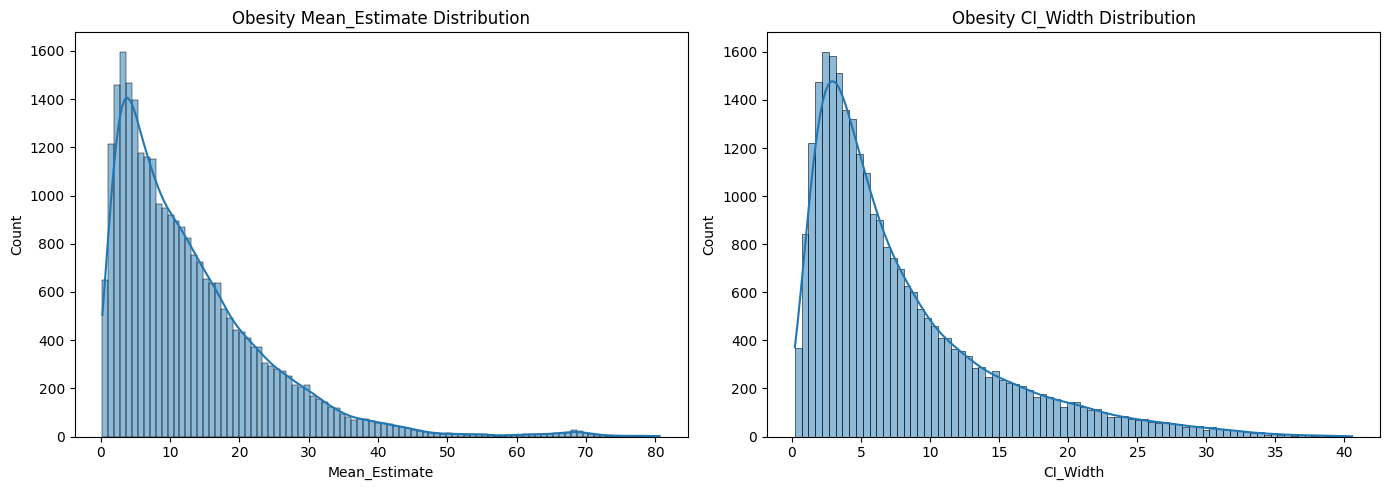

In [68]:
# Histogram for Mean_Estimate and CI_Width
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_obesity['Mean_Estimate'], kde=True, ax=ax[0])
ax[0].set_title('Obesity Mean_Estimate Distribution')

sns.histplot(df_obesity['CI_Width'], kde=True, ax=ax[1])
ax[1].set_title('Obesity CI_Width Distribution')

plt.tight_layout()
plt.show()


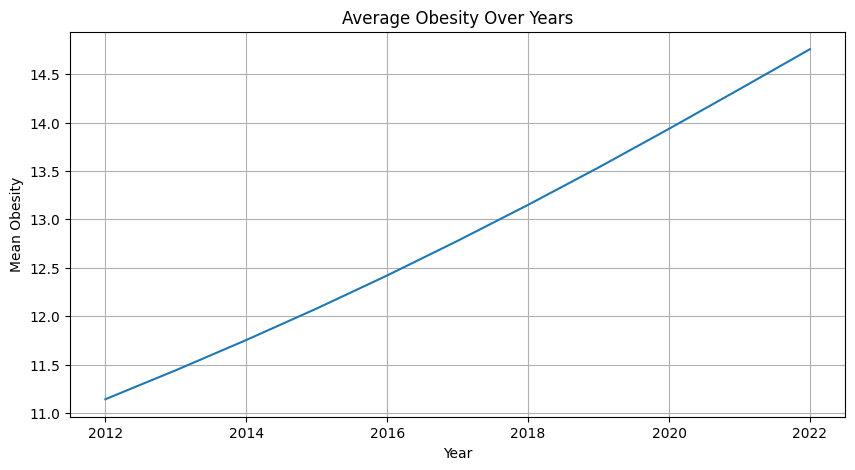

In [69]:
# Average obesity over time
df_yearly = df_obesity.groupby('Year')['Mean_Estimate'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_yearly, x='Year', y='Mean_Estimate')
plt.title('Average Obesity Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Obesity')
plt.grid(True)
plt.show()


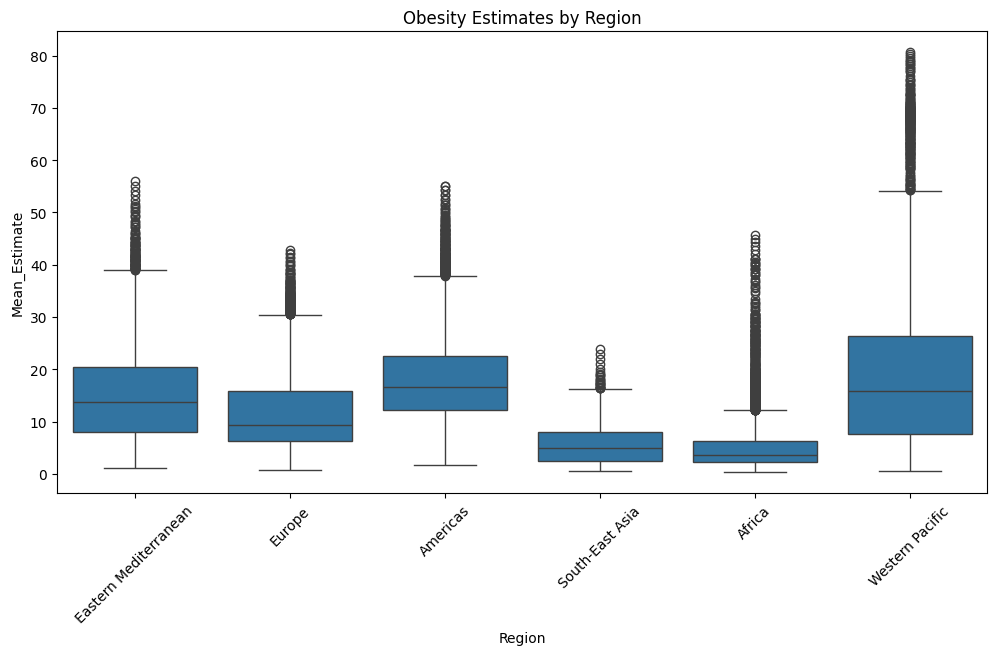

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_obesity, x='Region', y='Mean_Estimate')
plt.xticks(rotation=45)
plt.title('Obesity Estimates by Region')
plt.show()


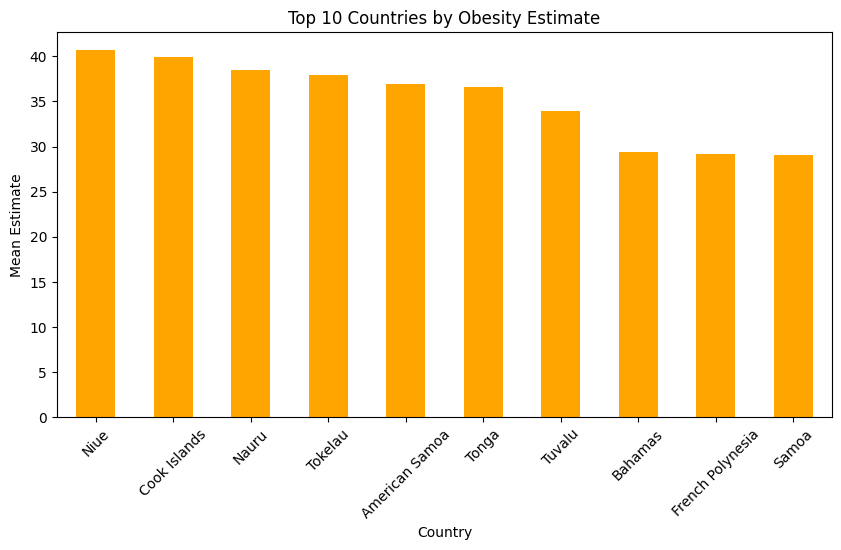

In [71]:
# Top 10 countries by obesity
top_countries = df_obesity.groupby('Country')['Mean_Estimate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Obesity Estimate')
plt.ylabel('Mean Estimate')
plt.xticks(rotation=45)
plt.show()


In [72]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27060 entries, 4 to 83154
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         27060 non-null  object 
 1   Gender         27060 non-null  object 
 2   Year           27060 non-null  int64  
 3   LowerBound     27060 non-null  float64
 4   UpperBound     27060 non-null  float64
 5   Mean_Estimate  27060 non-null  float64
 6   Country        27060 non-null  object 
 7   age_group      27060 non-null  object 
 8   CI_Width       27060 non-null  float64
 9   obesity_level  27060 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


In [73]:
df_malnutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13530 entries, 0 to 41577
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         13530 non-null  object 
 1   Gender         13530 non-null  object 
 2   Year           13530 non-null  int64  
 3   LowerBound     13530 non-null  float64
 4   UpperBound     13530 non-null  float64
 5   Mean_Estimate  13530 non-null  float64
 6   Country        13530 non-null  object 
 7   age_group      13530 non-null  object 
 8   CI_Width       13530 non-null  float64
 9   obesity_level  13530 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.1+ MB


In [74]:
df_obesity_for_corr = df_obesity.copy() 
code = LabelEncoder()
for i in df_obesity_for_corr.columns:
  if df_obesity_for_corr[i].dtype=="object":
    df_obesity_for_corr[i]= code.fit_transform(df_obesity_for_corr[i]) # Encoding
    

<Axes: >

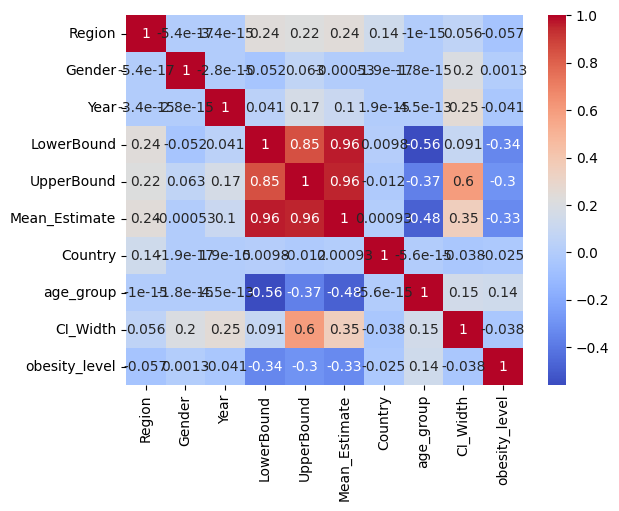

In [75]:
sns.heatmap(df_obesity_for_corr.corr(),annot=True,cmap="coolwarm")

In [76]:
df_malnutrition_for_corr = df_malnutrition.copy() 
code = LabelEncoder()
for i in df_malnutrition_for_corr.columns:
  if df_malnutrition_for_corr[i].dtype=="object":
    df_malnutrition_for_corr[i]= code.fit_transform(df_malnutrition_for_corr[i]) # Encoding
    

<Axes: >

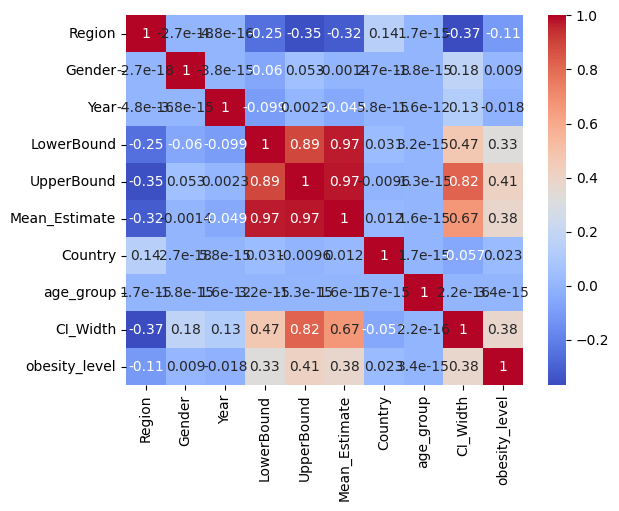

In [77]:
sns.heatmap(df_malnutrition_for_corr.corr(),annot=True,cmap="coolwarm")

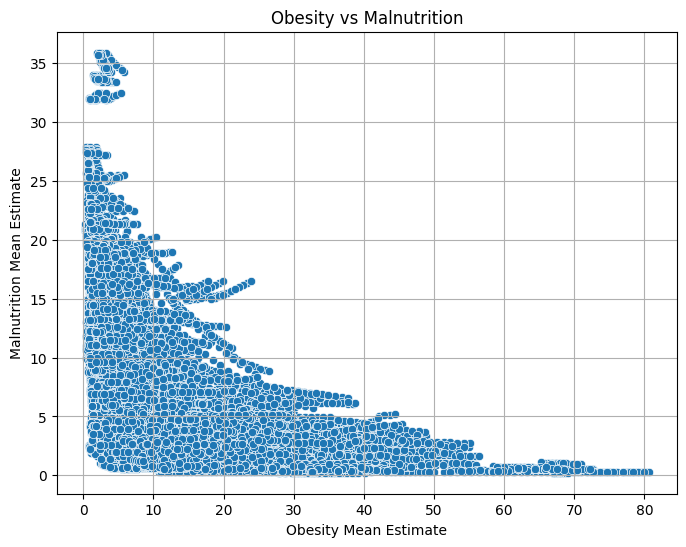

In [78]:
# Merge on common columns (like Year, Region, Age Group, etc.)
common = ['Country', 'Year', 'age_group', 'Gender']
merged = pd.merge(df_obesity, df_malnutrition, on=common, suffixes=('_obesity', '_malnutrition'))

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged, x='Mean_Estimate_obesity', y='Mean_Estimate_malnutrition')
plt.title('Obesity vs Malnutrition')
plt.xlabel('Obesity Mean Estimate')
plt.ylabel('Malnutrition Mean Estimate')
plt.grid(True)
plt.show()


In [87]:
df_obesity

Region  Gender  Year  LowerBound  UpperBound  \
4      Eastern Mediterranean    Male  2020   15.793777   19.245727   
11     Eastern Mediterranean    Male  2020   23.089589   33.815336   
17                    Europe  Female  2014   24.924766   31.213260   
19                    Europe  Female  2019   28.160682   35.574925   
20                    Europe    Both  2018   29.905805   37.470856   
...                      ...     ...   ...         ...         ...   
83137                 Europe    Both  2020    0.964176    2.197432   
83140  Eastern Mediterranean  Female  2012    0.302039    5.872414   
83148        Western Pacific    Male  2021    3.325899   34.877816   
83151                 Africa    Male  2014    0.236481    6.341185   
83154                 Europe    Male  2017   10.087850   12.760153   

       Mean_Estimate                    Country age_group   CI_Width  \
4          17.487641  Iran, Islamic Republic of    adults   3.451950   
11         28.335530                       Iraq    adults  10.725747   
17         27.948704                  Greenland    adults   6.288494   
19         31.893221                    Armenia    adults   7.414243   
20         33.694205                      Malta    adults   7.565051   
...              ...                        ...       ...        ...   
83137       1.475931                 Tajikistan  children   1.233255   
83140       1.966190                    Somalia  children   5.570375   
83148      16.634887                    Vanuatu  children  31.551917   
83151       2.032189                 Madagascar  children   6.104704   
83154      11.390631                    Finland  children   2.672303   

      obesity_level  
4               Low  
11         Moderate  
17         Moderate  
19             High  
20             High  
...             ...  
83137           Low  
83140           Low  
83148           Low  
83151           Low  
83154           Low  

[27060 rows x 10 columns]

In [97]:
# establishing connection
connection = mysql.connector.connect(host='gateway01.ap-southeast-1.prod.aws.tidbcloud.com',
                               user='3AgaX31voqjKoCg.root',
                               password='B0VUhselpkYfTPPK',
                               port = 4000)
cursor = connection.cursor()

In [98]:
# Creating Database
cursor.execute("create database nutrition_paradox")

In [99]:
#selecting the databse
cursor.execute("use nutrition_paradox")

In [100]:
#Creating Obesity Table
cursor.execute("""CREATE TABLE obesity(
    Country VARCHAR(255),
    Year INT,
    Mean_Estimate FLOAT,
    LowerBound FLOAT,
    UpperBound FLOAT,
    Region VARCHAR(255),
    Gender VARCHAR(20),
    age_group VARCHAR(100),
    CI_Width FLOAT,
    obesity_level VARCHAR(100)
)""")


In [101]:
#Creating malnutrition Table
cursor.execute("""CREATE TABLE malnutrition(
    Country VARCHAR(255),
    Year INT,
    Mean_Estimate FLOAT,
    LowerBound FLOAT,
    UpperBound FLOAT,
    Region VARCHAR(255),
    Gender VARCHAR(20),
    age_group VARCHAR(100),
    CI_Width FLOAT,
    obesity_level VARCHAR(100)
)""")


In [102]:
# Prepare the data as a list of tuples
obesity_data = [
    (
        row['Country'],
        int(row['Year']),
        float(row['Mean_Estimate']),
        float(row['LowerBound']),
        float(row['UpperBound']),
        row['Region'],
        row['Gender'],
        row['age_group'],
        float(row['CI_Width']),
        row['obesity_level']
    )
    for _, row in df_obesity.iterrows()
]

# Insert all rows in one go
cursor.executemany("""
    INSERT INTO obesity (Country, Year, Mean_Estimate, LowerBound, UpperBound, Region, Gender, Age_Group, CI_Width, Obesity_level)
    VALUES (%s, %s, %s, %s, %s, %s,%s, %s, %s, %s)
""", obesity_data)


In [104]:
# Prepare the data as a list of tuples
malnutrition_data = [
    (
        row['Country'],
        int(row['Year']),
        float(row['Mean_Estimate']),
        float(row['LowerBound']),
        float(row['UpperBound']),
        row['Region'],
        row['Gender'],
        row['age_group'],
        float(row['CI_Width']),
        row['obesity_level']
    )
    for _, row in df_malnutrition.iterrows()
]

# Insert all rows in one go
cursor.executemany("""
    INSERT INTO malnutrition (Country, Year, Mean_Estimate, LowerBound, UpperBound, Region, Gender, Age_Group, CI_Width, Obesity_level)
    VALUES (%s, %s, %s, %s, %s, %s,%s, %s, %s, %s)
""", malnutrition_data)


In [105]:
connection.commit()